In [1]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import *
from matplotlib import pyplot
from time import time

In [2]:
from xgboost import *

# data preparation

In [ ]:
path = "C:/Users/VIPLAB/Desktop/preprocess_py/marketing_analyze/"
filename = "mkt_with_11_group_id_20170712.csv"
train_df = pd.read_csv(path + filename, error_bad_lines=False, nrows = 100)

In [ ]:
train_df['W2P_SMS_MO_ONNET_CNT'].dtypes

In [ ]:
train_df['W2P_SMS_MO_ONNET_CNT'].values
# train_df.groupby('BILL_DISTRICT_NAME').describe()

In [ ]:
X = train_df.values[:,:-1]
Y = train_df.values[:,-1]

In [ ]:
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(Y)
label_encoded_y = label_encoder.transform(Y)

In [ ]:
label_encoded_y

# categorical feature encoding without one hot encode

In [56]:
path = "C:/Users/VIPLAB/Desktop/preprocess_py/marketing_analyze/"
filename = "0725_april_marketing_anylze_select_294_table_group11.csv"
# filename = "0719_april_marketing_anylze_full_table_group11_max_min_train.csv"
train_df = pd.read_csv(path + filename, error_bad_lines=False)

In [4]:
# train_df.drop(train_df['Groups'] == 'Infrequent_User', inplace=True)
train_df = train_df[train_df['Groups'] != 'Infrequent_User']

train_df.groupby('Groups').count()

,DATA_MONTH,DATA_MONTH_RPT_TEMP1,DATA_MONTH_RPT_TEMP2,DATA_MONTH_RPT,DW_PARTY_ID,RENEW_IND,GA_IND,ACTV_TYPE,GA_DATE,CHURN_IND,...,L2M_DEVICE_MODEL,L2M_DEVICE_PRICE_TIER,L2M_DEVICE_TYPE,HS_CHG_CNT,AVG_HS_USE_MONTH,AVG_HS_USE_MONTH_EX_CURR,ZONE_ACTV_IVR_COUNTRY,ZONE_ACTV_IVR_REGION,STORE_TYPE,SPAUTH_IND
Groups,,,,,,,,,,,,,,,,,,,,,
Adult,54309,54309,54309,54309,54309,54309,54309,54309,54309,54309,...,54309,54309,54309,54309,54309,54309,54309,54309,54309,54309
Game,87618,87618,87618,87618,87618,87618,87618,87618,87618,87618,...,87618,87618,87618,87618,87618,87618,87618,87618,87618,87618
HomeLife,74949,74949,74949,74949,74949,74949,74949,74949,74949,74949,...,74949,74949,74949,74949,74949,74949,74949,74949,74949,74949
InstantMessage-High,424699,424699,424699,424699,424699,424699,424699,424699,424699,424699,...,424699,424699,424699,424699,424699,424699,424699,424699,424699,424699
InstantMessage-Low,431903,431903,431903,431903,431903,431903,431903,431903,431903,431903,...,431903,431903,431903,431903,431903,431903,431903,431903,431903,431903
Map,103786,103786,103786,103786,103786,103786,103786,103786,103786,103786,...,103786,103786,103786,103786,103786,103786,103786,103786,103786,103786
News,57174,57174,57174,57174,57174,57174,57174,57174,57174,57174,...,57174,57174,57174,57174,57174,57174,57174,57174,57174,57174
No_ignificant_preference,266966,266966,266966,266966,266966,266966,266966,266966,266966,266966,...,266966,266966,266966,266966,266966,266966,266966,266966,266966,266966
Portal,98614,98614,98614,98614,98614,98614,98614,98614,98614,98614,...,98614,98614,98614,98614,98614,98614,98614,98614,98614,98614


In [55]:
train_df["INACTV_DATE"].head()

0    0
2    0
3    0
4    0
5    0
Name: INACTV_DATE, dtype: int64

In [53]:
for c in train_df.columns:
    l = len(train_df[c].value_counts())
    if l > 1000:
        print(c)
        print(l)
        
# 

DW_PARTY_ID
1713536
P6M_AVG_NET_INV_AMT
230149
TENURE_SCV
2338
IMEI_MKT_NAME
1690
ACTV_STORE_ID
17044
ACTV_CHANNEL_NAME
1921
SHIPMENT_CHANNEL_CODE
2983
SHIPMENT_CHANNEL_NAME
1186
PROM_CURR_PROM_CODE
6679
PROM_CURR_PROM_NAME
6679
PROM_ACTV_PROM_CODE
11247
PROM_ACTV_PROM_NAME
11833
L1M_PROM_CODE
6728
L1M_PROM_NAME
6728
L6M_AVG_NET_INV_AMT
228014
NET_INV_AMT
204209
L1M_NET_INV_AMT
197915
L2M_NET_INV_AMT
210504
L3M_NET_INV_AMT
217862
GPRS_AMT
4953
L1M_GPRS_AMT
4282
L2M_GPRS_AMT
5107
L3M_GPRS_AMT
5178
AGENCY_AMT
9935
SMS_INV_AMT
3414
L3M_AVG_NET_INV_AMT
220950
L6M_AVG_GPRS_AMT
15162
L3M_AVG_SMS_INV_AMT
6623
MT_STM_AMT
78374
VOICE_RC_AMT
20301
DATA_RC_AMT
19983
ONNET_AMT
13641
OFFNETM_AMT
38437
PSTN_AMT
31158
INT_ROAM_AMT
16862
IDD_AMT
8620
VAS_AMT
3442
NRC_AMT
2310
DATA_INV_AMT
65803
VOICE_INV_AMT
144712
MO_TTL_DURATION
53287
MO_ONNET_DUR
45953
MO_OFFNET_DUR
21056
PSTN_DUR
9150
MO_TTL_COUNT
1136
MT_TTL_DURATION
49391
MT_ONNET_DUR
42235
MT_OFFNET_DUR
19602
MT_PSTN_DUR
11890
MT_TTL_COUNT
1098

In [ ]:
np.max(train_df['CURR_BILL_PLAN_START_DATE'].values)
# train_df.columns.values

In [5]:
X_train = train_df.iloc[:, 0:-1].values
y_train = train_df.iloc[:, -1].values

In [8]:
param_grid = {
#     'max_depth':[3, 5],
#     'learning_rate':[0.1, 0.05, 0.2],
#     'n_estimators':[50, 100, 200]
#     'max_depth':[10],
#     'learning_rate':[0.05],
#     'n_estimators':[100]
    'max_depth':[10],
    'min_child_weight':[3]
}


In [9]:
t0 = time()
model = XGBClassifier(n_jobs = -1)
# kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=7)
gs = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=2)
gs.fit(X_train, y_train)
print("training time:  %.2f" % (time()-t0))

training time:  73769.85


In [10]:
import requests
requests.post(
        "https://api.mailgun.net/v3/sandboxe9bb891a60414f4bae93f2cc55daa963.mailgun.org/messages",
        auth=("api", "key-a007a22faf334a3510137b6cc03c21a6"),
        data={"from": "Mailgun Sandbox <postmaster@sandboxe9bb891a60414f4bae93f2cc55daa963.mailgun.org>",
              "to": "Toby <atch84@gmail.com>",
              "subject": "XGBoost Result",
              "text": str(gs.cv_results_)})

<Response [200]>

In [12]:
print(gs.best_score_)
print(gs.best_params_)
best_model = gs.best_estimator_

0.325582465204
{'max_depth': 10, 'min_child_weight': 3}


In [13]:
gs.cv_results_

{'mean_fit_time': array([ 21397.21735339]),
 'mean_score_time': array([ 23.58460579]),
 'mean_test_score': array([ 0.32558247]),
 'mean_train_score': array([ 0.40253901]),
 'param_max_depth': masked_array(data = [10],
              mask = [False],
        fill_value = ?),
 'param_min_child_weight': masked_array(data = [3],
              mask = [False],
        fill_value = ?),
 'params': ({'max_depth': 10, 'min_child_weight': 3},),
 'rank_test_score': array([1]),
 'split0_test_score': array([ 0.32485243]),
 'split0_train_score': array([ 0.40314638]),
 'split1_test_score': array([ 0.32473929]),
 'split1_train_score': array([ 0.40179084]),
 'split2_test_score': array([ 0.32554435]),
 'split2_train_score': array([ 0.40330537]),
 'split3_test_score': array([ 0.32588263]),
 'split3_train_score': array([ 0.40173635]),
 'split4_test_score': array([ 0.32689366]),
 'split4_train_score': array([ 0.40271608]),
 'std_fit_time': array([ 4809.59286787]),
 'std_score_time': array([ 5.29455957]),
 'st

In [ ]:
model = XGBClassifier(n_jobs = -1, **{"updater": "grow_gpu"})
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)

In [ ]:
t0 = time()
model = XGBClassifier(n_jobs = -1)
model.fit(X_train, y_train)
# result =  cross_val_score(model,  X_train, y_train, cv=kfold, n_jobs=-1)
print("training time: %.2f" % (time()-t0))

In [ ]:
result

In [ ]:
path = "C:/Users/VIPLAB/Desktop/preprocess_py/marketing_analyze/"
filename = "0719_april_marketing_anylze_full_table_group11_max_min_test.csv"
test_df = pd.read_csv(path + filename, error_bad_lines=False)

In [ ]:
X_test = test_df.iloc[:, 0:-1].values
y_test = test_df.iloc[:, -1].values

In [14]:
pred = best_model.predict(X_train)

In [12]:
accuracy = accuracy_score(y_train, pred)
print("Train Accuracy: %.2f%%" % (accuracy * 100.0))

Train Accuracy: 31.35%


In [ ]:
pred = best_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, pred)
print("Test Accuracy: %.2f%%" % (accuracy * 100.0))

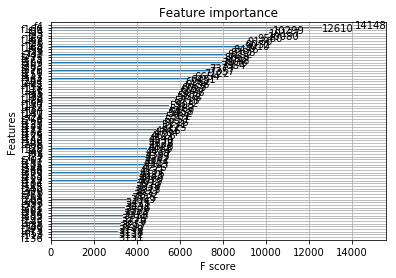

In [37]:
plot_importance(best_model, max_num_features = 80)
pyplot.show()

In [ ]:
import winsound
winsound.PlaySound('crows.wav', winsound.SND_FILENAME)

In [ ]:
test_df.columns[166]

In [16]:
col_rank = pd.DataFrame()

In [17]:
col_rank['column_name'] = train_df.columns[:-1]

In [18]:
col_rank['importance'] = best_model.feature_importances_

In [19]:
col_rank = col_rank.sort_values('importance', ascending = False)

In [30]:
# np.sum(col_rank['importance'].values) -> 1.0
np.sum(col_rank['importance'].values[:84])

0.80315292

In [33]:
col_rank.iloc[:42]

,column_name,importance
4,DW_PARTY_ID,0.024713
166,DATA_USAGE_MB,0.022027
34,IMEI_MKT_NAME,0.017990
23,TENURE_SCV,0.017707
22,AGE,0.017607
169,L3M_DATA_USAGE_MB,0.016734
26,BILL_ZIP_CODE,0.015948
25,BILL_DISTRICT_NAME,0.015777
168,L2M_DATA_USAGE_MB,0.015738
38,ACTV_STORE_ID,0.014805


In [34]:
col_rank.iloc[42:84]

,column_name,importance
142,MT_OFFNET_DUR,0.007937
180,MOST_MT_DUR,0.007913
20,P6M_AVG_NET_INV_AMT,0.007909
288,L1M_DEVICE_MODEL,0.007909
128,DATA_INV_AMT,0.007839
42,SHIPMENT_CHANNEL_NAME,0.007710
75,PROM_CURR_PROM_CODE,0.007680
87,PROM_ACTV_PROM_SUB_TYPE,0.007632
267,P3M_MO_OFFNET_CNT,0.007584
132,MO_TTL_DURATION,0.007536


## save model

In [35]:
best_model._Booster.save_model('xgboost_without_infre_0724_2.model')

In [43]:
import pickle
pickle.dump(best_model, open("xgboost_without_infre_0724_2.pickle.dat", "wb"))

## load model

In [ ]:
clf = XGBClassifier()
booster = Booster()
booster.load_model('xgboost_without_infre_0721.model')
clf._Booster = booster

In [44]:
loaded_model = pickle.load(open("xgboost_without_infre_0724_2.pickle.dat", "rb"))

In [ ]:
plot_importance(clf, max_num_features = 20)
pyplot.show()

In [45]:
pred = loaded_model.predict(X_train)

KeyboardInterrupt: 

In [40]:
from sklearn.metrics import confusion_matrix
labels = ['Adult', 'Game', 'HomeLife', 'InstantMessage-High', 'InstantMessage-Low', 'Map', 'News', 'No_ignificant_preference', 'Portal', 'Social-media']
cnf_matrix = confusion_matrix(y_train, pred, labels=labels)
cnf_matrix

array([[  4382,    121,      1,  11851,  17583,     11,    112,  18465,
          1205,    578],
       [   212,   4559,      0,  32489,  28936,     15,    184,  18860,
          1189,   1174],
       [   105,     71,    812,  15348,  40009,     25,     41,  16517,
          1437,    584],
       [   312,    248,      2, 261112, 119215,     48,    297,  39039,
          1762,   2664],
       [   280,    264,      1, 119229, 254509,     54,    330,  51663,
          2659,   2914],
       [     3,      1,      0,  25990,  74817,   1538,      9,   1381,
            35,     12],
       [   114,     85,      0,  22846,  14331,      0,   4802,  13702,
           365,    929],
       [   162,    277,      1,  68350,  73453,     20,    346, 119559,
          2771,   2027],
       [   173,    164,      0,  33351,  17987,      1,    175,  29198,
         16214,   1351],
       [   196,    153,      1,  54443,  46249,     13,    172,  25615,
          1164,  10964]])

In [41]:
cnf_pd = pd.DataFrame(cnf_matrix)
cnf_pd.columns = labels
cnf_pd.index = labels
cnf_pd

,Adult,Game,HomeLife,InstantMessage-High,InstantMessage-Low,Map,News,No_ignificant_preference,Portal,Social-media
Adult,4382,121,1,11851,17583,11,112,18465,1205,578
Game,212,4559,0,32489,28936,15,184,18860,1189,1174
HomeLife,105,71,812,15348,40009,25,41,16517,1437,584
InstantMessage-High,312,248,2,261112,119215,48,297,39039,1762,2664
InstantMessage-Low,280,264,1,119229,254509,54,330,51663,2659,2914
Map,3,1,0,25990,74817,1538,9,1381,35,12
News,114,85,0,22846,14331,0,4802,13702,365,929
No_ignificant_preference,162,277,1,68350,73453,20,346,119559,2771,2027
Portal,173,164,0,33351,17987,1,175,29198,16214,1351
Social-media,196,153,1,54443,46249,13,172,25615,1164,10964


In [26]:
del train_df
del X_train

In [ ]:
del X

In [ ]:
import os
os.system('python XGBoost_date_to_num.py')